In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine) 

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [27]:
data = pd.read_sql("SELECT * FROM Measurement", conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


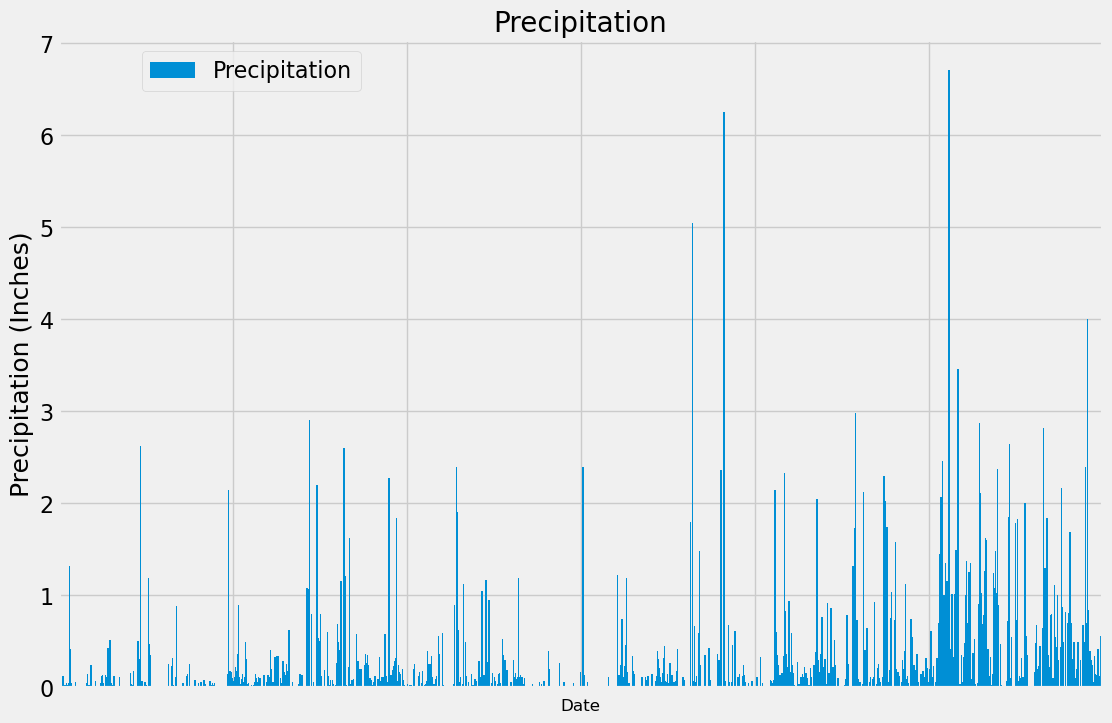

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
most_recent_date= dt.datetime(2017, 8, 23)
one_year_ago = most_recent_date  - dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores

prcp_date = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=one_year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(prcp_date, columns = ['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
# Sort the dataframe by date

#climate_df = climate_df.set_index("date")
#climate_df_new = df.rename(columns={'prcp': 'Inches', 'date': 'Date'})
# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=12)
plt.xticks(rotation='vertical')

plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()
#stats_df = pd.DataFrame(summary)
#stats_df.rename(columns = {"prcp": "Precipitation"})

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
station_query = session.query(func.count(func.distinct(Measurement.station))).all()
station_query


[(9,)]

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = most_stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == active_station).all()

[(54.0, 71.66378066378067, 85.0)]

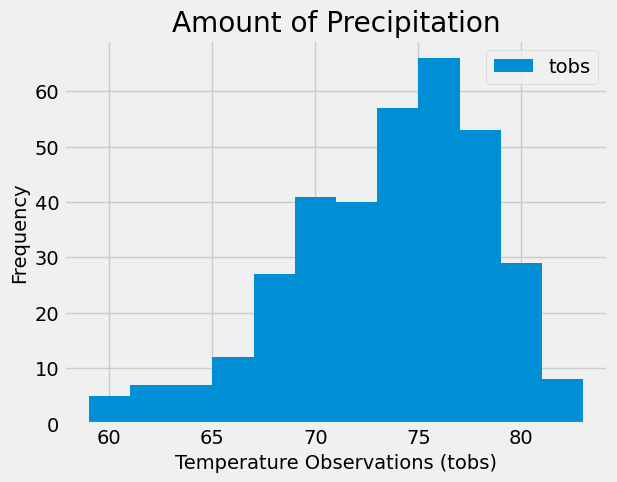

In [33]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#tempe_query = session.query(func.distinct(Measurement.tobs), func.count(Measurement.tobs)).group_by(Measurement.tobs).filter(Measurement.date >= one_year_ago).filter(Measurement.station == active_station)
temp_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == active_station).\
                filter(Measurement.date >= one_year_ago).all()
last_year_df = pd.DataFrame(temp_results, columns=['date', 'tobs'])
last_year_df
df = pd.DataFrame(last_year_df, columns=['tobs'])


# Step 5: Plot the histogram using Matplotlib

df.plot.hist(bins=12)
plt.title(f"Amount of Precipitation")
plt.tight_layout()
plt.xlabel('Temperature Observations (tobs)')
plt.show()



# Close Session

In [34]:
# Close Session
session.close()